(60000, 784)
(10000, 784)
Epoch 1/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0250 - val_loss: 0.0089
Epoch 2/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0063 - val_loss: 0.0044
Epoch 3/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 4/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 5/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/15
938/938 [==============================] - 6s 7ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/15
938/938 [==============================] - 8s 9ms/step - loss:

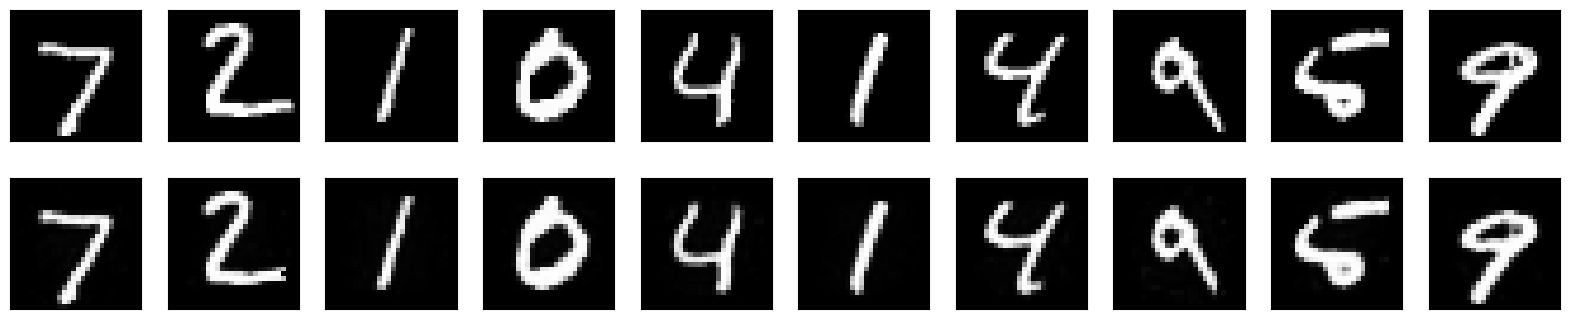

In [2]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameter: Number of neurons in the encoded layer
encoding_dim = 128  # Changed from 64 to 128

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Hyperparameter: Optimizer and loss function
optimizer = 'adam'  # No change
loss_function = 'mean_squared_error'  # Changed from 'binary_crossentropy' to 'mean_squared_error'

autoencoder.compile(optimizer=optimizer, loss=loss_function)

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Display the shapes of training and test data
print(x_train.shape)
print(x_test.shape)

# Hyperparameter: Number of training epochs and batch size
epochs = 15  # Changed from 10 to 15
batch_size = 64  # Changed from 128 to 64

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Plot original and reconstructed images
def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the results
plot_autoencoder_outputs(autoencoder, 10, (28, 28))


In [5]:
# in the previous code we update some hyperparameters see details in the code

In [6]:
# This is an auto-encoder with Huber loss as the loss function

(60000, 784)
(10000, 784)
Epoch 1/15
938/938 [==============================] - 9s 8ms/step - loss: 0.0134 - val_loss: 0.0044
Epoch 2/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 3/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 4/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0010 - val_loss: 9.9078e-04
Epoch 9/15
938/938 [==============================] - 8s 8ms/step - loss: 9.8590e-04 - val_loss: 9.6907e-04
Epoch 10/15
938/938 [==============================] - 7s 8ms/

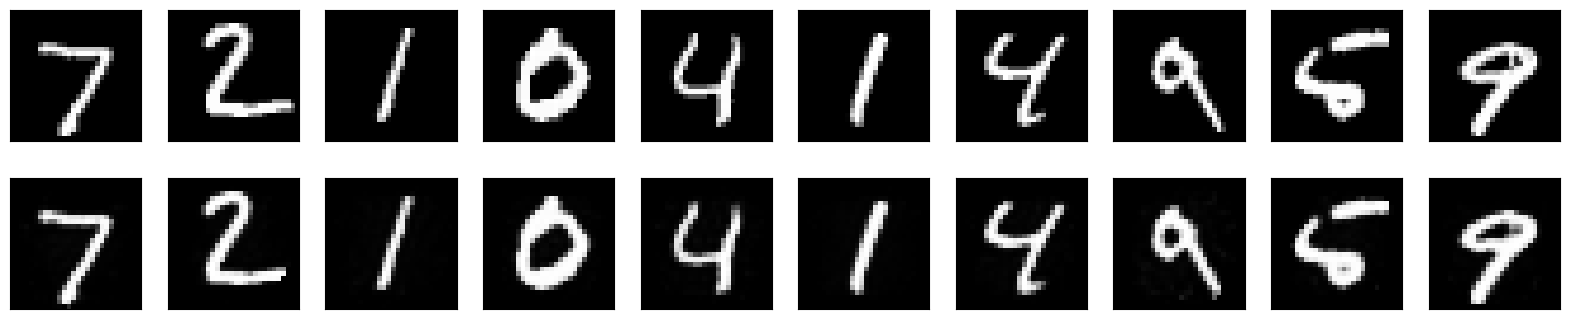

In [4]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Define Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    quadratic_part = tf.minimum(tf.abs(error), 0.5 * delta)
    linear_part = tf.abs(error) - quadratic_part
    return tf.reduce_mean(0.5 * tf.square(quadratic_part) + delta * linear_part)

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Compile the autoencoder with Huber loss as the loss function
autoencoder.compile(optimizer='adam', loss=huber_loss)

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Display the shapes of training and test data
print(x_train.shape)
print(x_test.shape)

# Number of training epochs and batch size
epochs = 15
batch_size = 64

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the results
plot_autoencoder_outputs(autoencoder, 10, (28, 28))



In [7]:
# This is an auto-encoder with MSE as the loss function

(60000, 784)
(10000, 784)
Epoch 1/15
938/938 [==============================] - 9s 8ms/step - loss: 0.0246 - val_loss: 0.0087
Epoch 2/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0063 - val_loss: 0.0044
Epoch 3/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 4/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 5/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/15
938/938 [==============================] - 7s 7ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/15
938/938 [==============================] - 7s 8ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/15
938/938 [==============================] - 7s 8ms/step - loss:

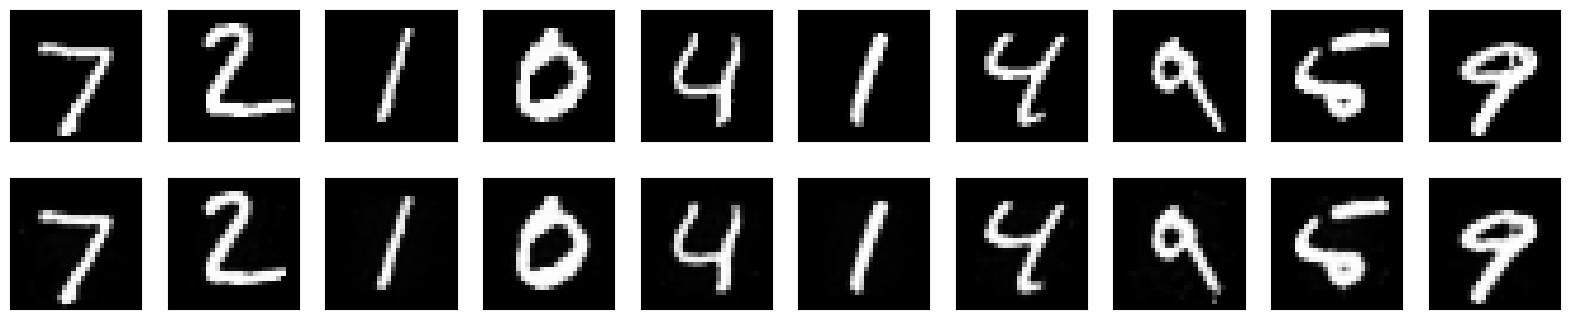

In [6]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Compile the autoencoder with Mean Squared Error (MSE) as the loss function
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Display the shapes of training and test data
print(x_train.shape)
print(x_test.shape)

# Number of training epochs and batch size
epochs = 15
batch_size = 64

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the results
plot_autoencoder_outputs(autoencoder, 10, (28, 28))


In [8]:
# This is an auto-encoder with SSIM as the loss function




(60000, 784)
(10000, 784)
Epoch 1/15

938/938 [==============================] - 41s 40ms/step - loss: 0.2565 - val_loss: 0.1061
Epoch 2/15
938/938 [==============================] - 37s 39ms/step - loss: 0.0871 - val_loss: 0.0730
Epoch 3/15
938/938 [==============================] - 36s 39ms/step - loss: 0.0702 - val_loss: 0.0648
Epoch 4/15
938/938 [==============================] - 36s 38ms/step - loss: 0.0641 - val_loss: 0.0605
Epoch 5/15
938/938 [==============================] - 35s 37ms/step - loss: 0.0608 - val_loss: 0.0584
Epoch 6/15
938/938 [==============================] - 35s 37ms/step - loss: 0.0586 - val_loss: 0.0566
Epoch 7/15
938/938 [==============================] - 35s 37ms/step - loss: 0.0569 - val_loss: 0.0553
Epoch 8/15
938/938 [==============================] - 37s 39ms/step - loss: 0.0555 - val_loss: 0.0541
Epoch 9/15
938/938 [==============================] - 35s 37ms/step - loss: 0.0545 - val_loss: 0.0537
Epoch 10/15
938/938 [==============================]

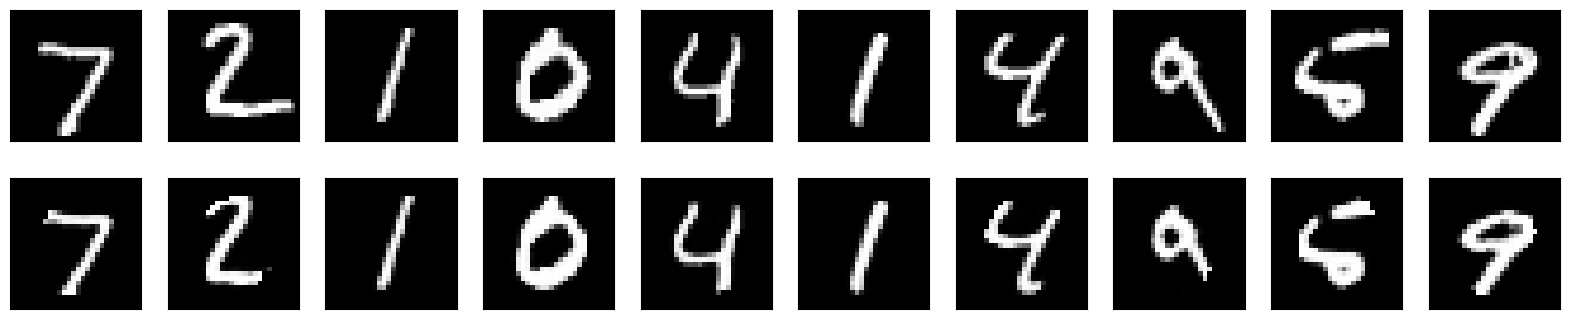

In [1]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Define custom SSIM loss function
def ssim_loss(y_true, y_pred):
    # Reshape to (batch_size, height, width, channels) for SSIM calculation
    y_true = tf.reshape(y_true, [-1, 28, 28, 1])
    y_pred = tf.reshape(y_pred, [-1, 28, 28, 1])
    return 1.0 - tf.image.ssim(y_true, y_pred, max_val=1.0)

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Compile the autoencoder with SSIM as the loss function
autoencoder.compile(optimizer='adam', loss=ssim_loss)

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Display the shapes of training and test data
print(x_train.shape)
print(x_test.shape)

# Number of training epochs and batch size
epochs = 15
batch_size = 64

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the results
plot_autoencoder_outputs(autoencoder, 10, (28, 28))



In [9]:
# This is an auto-encoder with PSNR as the loss function

(60000, 784)
(10000, 784)
Epoch 1/15
938/938 [==============================] - 8s 8ms/step - loss: 0.7850 - val_loss: 0.7217
Epoch 2/15
938/938 [==============================] - 7s 8ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 3/15
938/938 [==============================] - 7s 7ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 4/15
938/938 [==============================] - 8s 9ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 5/15
938/938 [==============================] - 7s 8ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 6/15
938/938 [==============================] - 7s 7ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 7/15
938/938 [==============================] - 7s 7ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 8/15
938/938 [==============================] - 7s 7ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 9/15
938/938 [==============================] - 7s 7ms/step - loss: 0.7181 - val_loss: 0.7217
Epoch 10/15
938/938 [==============================] - 7s 7ms/step - loss:

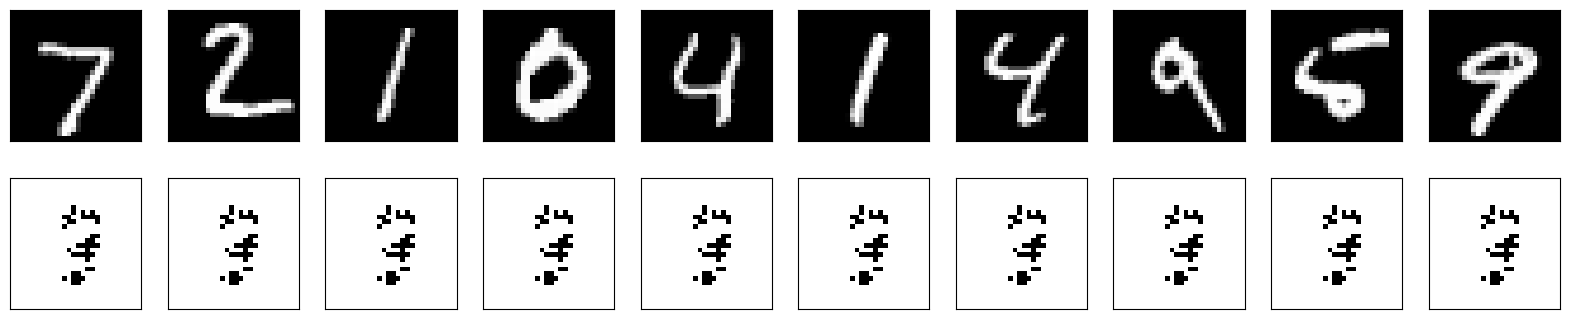

In [2]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Define custom PSNR loss function
def psnr_loss(y_true, y_pred):
    max_pixel = 1.0
    return -10.0 * tf.math.log(tf.reduce_mean(tf.square(y_pred - y_true)) / (max_pixel ** 2)) / tf.math.log(10.0)

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Compile the autoencoder with PSNR as the loss function
autoencoder.compile(optimizer='adam', loss=psnr_loss)

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Display the shapes of training and test data
print(x_train.shape)
print(x_test.shape)

# Number of training epochs and batch size
epochs = 15
batch_size = 64

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the results
plot_autoencoder_outputs(autoencoder, 10, (28, 28))


In [2]:
# In this code, the training and test sets are concatenated into x_combined. The autoencoder is then trained on this combined dataset. The validation data is set to 20% of the combined dataset to monitor the model's performance during training. 




(70000, 784)
Epoch 1/15

875/875 [==============================] - 7s 7ms/step - loss: 0.0258 - val_loss: 0.0098
Epoch 2/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0068 - val_loss: 0.0048
Epoch 3/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 4/15
875/875 [==============================] - 6s 7ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 5/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 6/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/15
875/875 [==============================] - 5s 6ms/step - loss: 0.0019 -

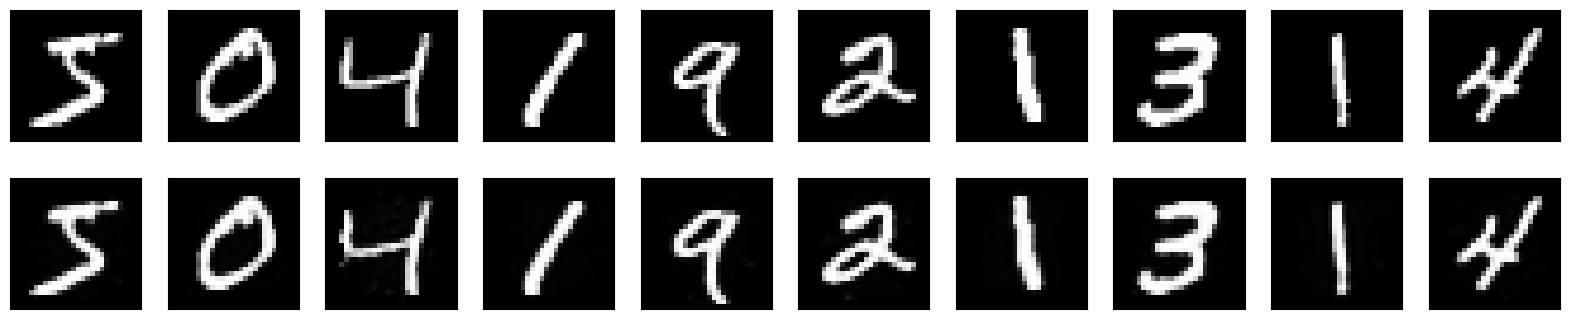

In [1]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Define Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Concatenate the training and test sets
x_combined = np.concatenate((x_train, x_test), axis=0)

# Normalize and flatten the data
x_combined = x_combined.astype('float32') / 255.
x_combined = x_combined.reshape((len(x_combined), np.prod(x_combined.shape[1:])))

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Compile the autoencoder with MSE as the loss function
autoencoder.compile(optimizer='adam', loss=mse_loss)

# Display the shape of the combined data
print(x_combined.shape)

# Number of training epochs and batch size
epochs = 15
batch_size = 64

autoencoder.fit(x_combined, x_combined,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_split=0.2)  # Use 20% of the data as validation

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_combined)

# Plot original and reconstructed images
def plot_autoencoder_outputs(autoencoder, n, dims):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_combined[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the results
plot_autoencoder_outputs(autoencoder, 10, (28, 28))
